# This code visualize scene graph annotations directly on the image

# Preamble

Set up paths and environment variables

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import json
import csv
import pandas as pd
import h5py
from tqdm import tqdm
from display_utils import show_all_rel_on_image, show_all_boxes_on_image

data_path = "../"

indoor_vg_dict = json.load(open(os.path.join(data_path,"datasets/IndoorVG_4/VG-SGG-dicts.json"), 'r'))
indoor_vg = h5py.File(os.path.join(data_path,"datasets/IndoorVG_4/VG-SGG-augmented-penet.h5"), 'r')

indoor_vg_orig = h5py.File(os.path.join(data_path,"datasets/IndoorVG_4/VG-SGG.h5"), 'r')

image_data = json.load(open(os.path.join(data_path,"datasets/vg/image_data.json"), 'r'))

vg_img_path = '/home/maelic/Documents/Datasets/VG/VG_100K'

datasets = {'IndoorVG': (indoor_vg, indoor_vg_dict), 'IndoorVG_orig': (indoor_vg_orig, indoor_vg_dict)}

to_test = ['IndoorVG', 'IndoorVG_orig']
datasets_to_test = {k: datasets[k] for k in to_test}

# Show a random image from split

9538
60635
IndoorVG
108073
Image ID: 2359459
Relations: 

clock on table, vase on table, table against wall, clock on table, leg of table, 


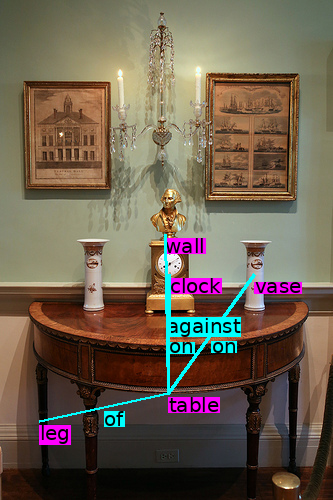

IndoorVG_orig
108073
Image ID: 2359459
Relations: 

clock on table, vase on table, table against wall, clock on table, leg of table, 


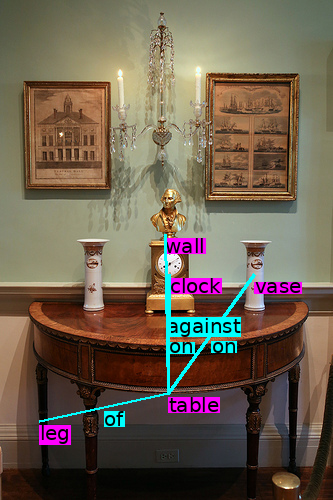

In [4]:
# get random image
data_split = indoor_vg['split_rel'][:]
split_mask = data_split == 0
split_mask &= indoor_vg['img_to_first_rel'][:] >= 0
image_index = np.where(split_mask)[0]
print(len(image_index))
img_idx = np.random.choice(image_index)
print(img_idx)

for dataset_name, (dataset_h5, dataset_dict) in datasets_to_test.items():
    print(dataset_name)
    print(len(dataset_h5['img_to_first_rel']))
    show_all_rel_on_image(image_data, dataset_h5, dataset_dict, img_idx, vg_img_path) # VG150 connected
